In [18]:
# K-Means Clustering Algorithm: is an unsupervised machine learning algorithm that groups data points into K distinct clusters. 
# This algorithm is widely used for customer segmentation, anomaly detection, and other business analytics, including in the insurance industry.
# Understand the Problem and Data: This step is similar to requirement gathering phase.
# Business Use Case: In insurance, K-Means can be used for customer segmentation. For example, customers with similar 
# characteristics (age, income, claim history) can be grouped to offer tailored insurance plans.
# Data Preprocessing: Prepare the data by: Handling missing values, Scaling the features (important for distance-based 
# algorithms like K-Means), Encoding categorical data

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("insurance_data.csv")

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Feature scaling (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Income', 'Claim_History']])

# Choose Number of Clusters (K) - The number of clusters (K) needs to be chosen. This can be done using the Elbow Method or the Silhouette Score.
# Elbow Method: - Plot the Within-Cluster Sum of Squares (WCSS) for different values of K and select the K at which the decrease 
# in WCSS starts slowing down.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-Means Model - Once the optimal K is determined, train the K-Means model on the data.

# Train K-Means with 3 clusters (for example)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

# Output the clusters
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Labels: ", y_kmeans)

# Visualize the Clusters - Visualizing the clusters can help to understand how well the data has been segmented.

# Visualize clusters (only works if data has 2 or 3 dimensions)
plt.scatter(scaled_data[y_kmeans == 0, 0], scaled_data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data[y_kmeans == 1, 0], scaled_data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data[y_kmeans == 2, 0], scaled_data[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Income)')
plt.legend()
plt.show()

# Analyze the Clusters - After clustering, analyze each group. For instance, group 1 might represent young, low-income customers, 
# while group 2 could represent older, high-income customers.

# Add the cluster labels to the original data for analysis
data['Cluster'] = y_kmeans

# Summarize each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

FileNotFoundError: [Errno 2] No such file or directory: 'insurance_data.csv'

In [20]:
pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   --------------------------------- ----- 786.4/920.8 kB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Fuzzy C-Means (FCM) Clustering Algorithm: Fuzzy C-Means (FCM) is a soft clustering algorithm where each data point belongs 
# to every cluster to a degree specified by a membership value. Unlike K-Means, where each point belongs to exactly one cluster, 
# FCM allows for partial membership in multiple clusters. This feature is particularly useful when data points have characteristics 
# of more than one group.
# Understand the Business Problem - Use Case in Insurance: FCM can be used in customer segmentation, where a customer may exhibit 
# behaviors belonging to multiple segments, e.g., a middle-aged customer who may have characteristics of both high-risk and low-risk 
# groups for health or life insurance.
# Data Preprocessing: Handling missing values: Use mean imputation or other techniques. 
# Scaling features: Important for distance-based algorithms like FCM.
    
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example Insurance Data
data = pd.read_csv("insurance_data.csv")

# Fill missing values
data.fillna(data.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Income', 'Claim_History']])

In [21]:
# Train Fuzzy C-Means Model - Use the FuzzyCMeans implementation from the skfuzzy library in Python.
import skfuzzy as fuzz
import numpy as np

# Number of clusters
n_clusters = 3

# Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(scaled_data.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# u contains the membership values
print(u)  # Membership matrix

# Cluster Analysis - •	Interpretation: The membership matrix u contains the degree to which each data point belongs 
# to each cluster. For example, a customer with 0.8 membership in Cluster 1 and 0.2 in Cluster 2 means that the customer mostly 
# belongs to Cluster 1, but with some characteristics from Cluster 2.

import matplotlib.pyplot as plt

# Visualizing membership for the first 2 dimensions
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=u[0, :], cmap='coolwarm')
plt.title('Fuzzy C-Means Clustering (Membership Heatmap)')
plt.show()

NameError: name 'scaled_data' is not defined

In [22]:
# Agglomerative Clustering is a hierarchical clustering algorithm that builds clusters step by step, starting with each 
# data point as its own cluster and merging the closest clusters iteratively. 
# Data Preprocessing - The first step in agglomerative clustering is to prepare the data, which involves handling missing values, 
# scaling the data (important for distance-based algorithms), and encoding categorical variables.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example Data
data = pd.read_csv("insurance_data.csv")

# Fill missing values (if any)
data.fillna(data.mean(), inplace=True)

# Scale the data for distance-based clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Income', 'Claim_History']])

# Choose the Distance Metric - Agglomerative clustering uses a distance metric to decide how close the data points are to each other. 
# The most common choices are: •	Euclidean distance: The straight-line distance between two points.
# •	Manhattan distance: The distance between points along axes at right angles. The distance is used to calculate the dissimilarity matrix.
# Apply Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Ward method
labels = agglom.fit_predict(scaled_data)

# Display the labels (cluster assignments for each point)
print(labels)

# Dendrogram Visualization - To visualize how clusters merge, you can plot a dendrogram. This shows the hierarchy of 
# merges (or splits) between clusters.

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'insurance_data.csv'

In [23]:
# Division Clustering is a type of hierarchical clustering approach that is quite different from agglomerative clustering. 
# Instead of starting with individual points and merging them, division clustering starts with all the data points in one 
# cluster and recursively divides them into smaller clusters. 

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

# Function to perform Division Clustering
def division_clustering(X, n_clusters=3, max_depth=3):
    clusters = [X]  # Start with the whole dataset as a single cluster
    
    for depth in range(max_depth):
        new_clusters = []
        
        for cluster in clusters:
            if len(cluster) > 1:  # Only split if more than one point
                kmeans = KMeans(n_clusters=2, random_state=0)
                kmeans.fit(cluster)
                # Append the new clusters formed by the KMeans split
                new_clusters.extend([cluster[kmeans.labels_ == i] for i in range(2)])
        
        clusters = new_clusters  # Update clusters for the next depth
    
    return clusters

# Perform division clustering
clusters = division_clustering(X, n_clusters=3, max_depth=2)

# Plot the results
for cluster in clusters:
plt.scatter(cluster[:, 0], cluster[:, 1], alpha=0.6)
plt.title("Division Clustering Results")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Output Interpretation:
# •	The data points will be divided into multiple clusters.
# •	The plot shows how the data is recursively split into smaller groups, with each group being represented by different colors.
# •	Clusters: The clusters are formed by dividing the original data into more homogenous subgroups.

IndentationError: expected an indented block after 'for' statement on line 35 (2695597962.py, line 36)

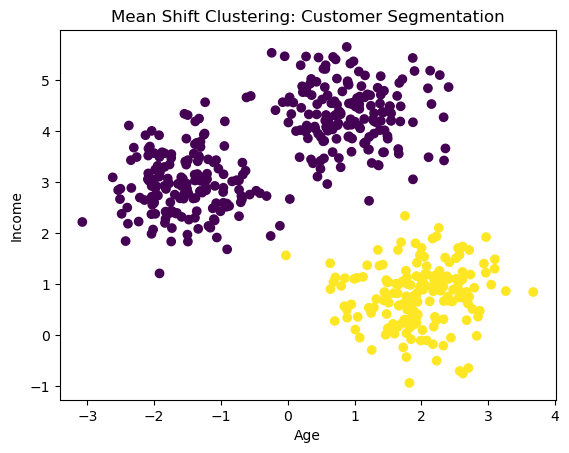

In [24]:
# Mean Shift is a non-parametric clustering algorithm that shifts each data point to the average of the points in its 
# neighborhood. It can find clusters of any shape without requiring the user to specify the number of clusters upfront, 
# making it particularly useful in scenarios where the number of clusters is unknown.
# Below is an example where Mean Shift is applied to a banking-related use case, such as customer segmentation based on age and income.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

# Generate synthetic data (customers' age and income)
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=2)
mean_shift.fit(X)

# Extract labels (cluster assignments)
labels = mean_shift.labels_

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering: Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Output Interpretation:
# •	Clusters: The different colors represent distinct clusters of customers based on age and income. For example, the dataset may segment customers into:
# o	Cluster 1: Younger customers with low income
# o	Cluster 2: Middle-aged customers with moderate income
# o	Cluster 3: Older customers with high income

In [26]:
# The Apriori algorithm is a classic algorithm used in association rule mining and market basket analysis. It identifies frequent itemsets in large datasets and generates association rules based on them.
# 1.	Install mlxtend Library:

# pip install mlxtend
# 2.	Sample Dataset: Consider a simple dataset of transactions where each list contains items purchased together.

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction dataset
data = {'Milk': [1, 1, 1, 0, 1],
        'Bread': [1, 1, 0, 1, 1],
        'Butter': [0, 1, 1, 1, 1],
        'Cheese': [1, 0, 0, 1, 1]}

df = pd.DataFrame(data)

# Convert the data to a format suitable for Apriori (binary format)
df_encoded = df.astype(bool)

# Apply Apriori algorithm to find frequent itemsets with a minimum support of 0.6
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# Generate the association rules with minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and the rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)
# Output Interpretation:
# 1.	Frequent Itemsets: The algorithm identifies sets of items that appear together frequently. 
# For example, a frequent itemset might be {Milk, Bread}, indicating that customers who buy milk often buy bread as well.
# 2.	Association Rules: The association rules generated show relationships between items. 
# For example, a rule like {Milk} -> {Bread} with a confidence of 0.8 means that 80% of transactions that contain Milk also contain Bread.

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [27]:
# Market Basket Analysis (MBA) is a data mining technique that helps understand the relationships between items bought together in a transaction. 

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset: Transactions (1 = item bought, 0 = item not bought)
data = {'Milk': [1, 1, 1, 0, 1],
        'Bread': [1, 1, 0, 1, 1],
        'Butter': [0, 1, 1, 1, 1],
        'Cheese': [1, 0, 0, 1, 1]}

df = pd.DataFrame(data)

# Convert the data to a boolean format suitable for Apriori
df_encoded = df.astype(bool)

# Apply the Apriori algorithm to find frequent itemsets with a minimum support of 0.6
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# Generate association rules with minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)
# Output Interpretation:
# 1.	Frequent Itemsets: These are the items or combinations of items that appear together in at least 
# 60% of transactions. For example, {Milk, Bread} might appear in 60% of transactions.
# 2.	Association Rules: These rules show how items are associated with each other. 
# For example, {Milk} -> {Bread} means that if a customer buys Milk, they are likely to buy Bread with 70% confidence.

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [28]:
# Association Rule Mining (ARM) is a technique used in data mining to find interesting relationships (associations) 
# between variables in large datasets.
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset: Transactions (1 = item bought, 0 = item not bought)
data = {'Loan': [1, 0, 1, 1, 0],
        'Credit_Card': [0, 1, 1, 1, 0],
        'Insurance': [1, 0, 1, 1, 1],
        'Checking_Account': [1, 1, 0, 1, 1]}

df = pd.DataFrame(data)

# Convert the data to boolean format (1 for item bought, 0 for not bought)
df_encoded = df.astype(bool)

# Apply the Apriori algorithm with a minimum support of 0.6
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# Generate association rules with minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)
# Output Interpretation:
# 1.	Frequent Itemsets: These are the sets of products that frequently occur together in the dataset. 
# For example, {Loan, Insurance} may appear in more than 60% of the transactions.
# Association Rules: For example, the rule {Loan} -> {Insurance} indicates that if a customer has taken a loan, 
# they are likely to buy insurance with 70% confidence.

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [29]:
# Pruning in the Apriori algorithm refers to the process of eliminating candidate itemsets that are unlikely to be frequent
# or don't meet the minimum support threshold. The goal of pruning is to reduce the number of candidate itemsets, 
# making the algorithm more efficient.

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data - 0 for not purchased, 1 for purchased
data = {
    'Loan': [1, 0, 1, 1, 0],
    'Credit_Card': [0, 1, 1, 1, 0],
    'Insurance': [1, 0, 1, 1, 1],
    'Checking_Account': [1, 1, 0, 1, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the DataFrame to boolean (True: 1, False: 0)
df_encoded = df.astype(bool)

# Apply Apriori algorithm with a minimum support of 0.6
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)
# Explanation of Pruning in the Code:
# •	Pruning by Minimum Support: The Apriori algorithm in this example prunes itemsets that appear less than 60% of the 
# time across all transactions. Itemsets such as {Loan} and {Insurance} that appear frequently are retained.
# •	Output Interpretation: The frequent itemsets and association rules show which combinations of banking products are 
# most commonly bought together by customers, such as {Loan, Credit_Card}.
# Output Interpretation:
# •	Frequent Itemsets: After pruning, only the itemsets that meet the minimum support (e.g., appearing at least 60% of the time) 
# are displayed. This reduces unnecessary computations on rare patterns.
# •	Association Rules: The pruning process ensures that only the most relevant rules (e.g., {Loan} -> {Credit_Card}) are generated, 
# helping the bank focus on actionable insights.
# By using pruning, the Apriori algorithm becomes more efficient in uncovering meaningful associations in the dataset while reducing
# unnecessary calculations.

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
# Subset creation in the Apriori algorithm is a critical step in generating candidate itemsets from frequent itemsets. 
# The process works based on the Apriori property, which states that all non-empty subsets of a frequent itemset must 
# also be frequent. This is used to generate new candidate itemsets and prune the search space.
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample data - 0 for not purchased, 1 for purchased
data = {
    'Loan': [1, 0, 1, 1, 0],
    'Credit_Card': [0, 1, 1, 1, 0],
    'Insurance': [1, 0, 1, 1, 1],
    'Checking_Account': [1, 1, 0, 1, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the DataFrame to boolean (True: 1, False: 0)
df_encoded = df.astype(bool)

# Apply Apriori algorithm with a minimum support of 0.6
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print("\nAssociation Rules:")
print(rules)
# Output Interpretation:
# 1.	Frequent Itemsets:
# o	The frequent itemsets show the most commonly purchased banking products, with the support values indicating how often they appear.
# 2.	Association Rules:
# The rules show the likelihood that customers with a loan will also have a checking account, and vice versa, helping the bank 
# develop targeted marketing strategies.

In [30]:
# Applying Rules in Apriori Algorithm - In the Apriori Algorithm, applying rules is a crucial step after finding frequent itemsets. 
# Once we have these itemsets, association rules are generated. These rules identify relationships between items and help in 
# predicting behaviors based on item combinations. The algorithm uses the concept of confidence, lift, and support to evaluate 
# how strong these rules are.

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset representing bank product purchases
data = {
    'Loan': [1, 0, 1, 1, 0],
    'Credit_Card': [0, 1, 1, 1, 0],
    'Insurance': [1, 0, 1, 1, 1],
    'Checking_Account': [1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

# Convert data into boolean values
df_encoded = df.astype(bool)

# Apply Apriori algorithm to find frequent itemsets with minimum support of 0.6
frequent_itemsets = apriori(df_encoded, min_support=0.6, use_colnames=True)

# Generate association rules with minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print("Association Rules:")
print(rules)

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [31]:
# Hierarchical Clustering is a method of clustering that builds a hierarchy of clusters by either iteratively merging 
# small clusters into larger ones (Agglomerative) or by dividing a large cluster into smaller ones (Divisive). 
# The resulting hierarchy is typically represented as a dendrogram, a tree-like diagram that shows how clusters are related to one another.
# Below is an example of how to apply Agglomerative Hierarchical Clustering in healthcare for grouping patients based on their age and blood pressure.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Example dataset: Patient age and blood pressure
data = {'Age': [45, 50, 55, 60, 65, 70, 75, 80, 85, 90],
        'Blood Pressure': [120, 130, 125, 140, 135, 145, 150, 160, 155, 165]}

df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Cluster'] = clustering.fit_predict(scaled_data)

# Plotting the Dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel('Patient Index')
plt.ylabel('Distance')
plt.show()

# Display the patient data with assigned clusters
print(df)

# Output Interpretation:
# •	Dendrogram: The dendrogram visually represents the hierarchical merging process, showing how clusters are progressively merged. 
# The vertical axis represents the distance or dissimilarity between the clusters.
# •	Cluster Assignment: The patients are grouped into three clusters, based on their age and blood pressure.
# •	The df dataframe shows the patients and the clusters they belong to. For instance, patients with similar age 
# and blood pressure would be in the same cluster, allowing healthcare providers to tailor their services.

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [32]:
# How to Decide the Number of Clusters in Clustering Algorithms
# Choosing the right number of clusters in a clustering algorithm is crucial for effective segmentation and analysis. 

# Using the Elbow Method and K-Means Clustering for customer segmentation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample banking customer data (e.g., Age, Income, Transactions)
data = {'Age': [25, 45, 30, 35, 50, 60, 40, 55],
        'Income': [50000, 100000, 55000, 65000, 120000, 140000, 75000, 110000],
        'Transactions': [5, 12, 7, 9, 15, 10, 8, 11]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the chosen number of clusters (e.g., 3 from elbow)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the dataset
df['Cluster'] = clusters
print(df)
# Output Interpretation:
# •	Elbow Method: The graph helps identify the point where the reduction in WCSS slows down, suggesting the optimal 
# number of clusters. In this case, it might be 3.
# •	Cluster Assignment: After fitting the K-means model, the customers are divided into three clusters based on 
# their age, income, and transaction frequency. These clusters represent different customer segments that can be targeted for 
# tailored banking services.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

ValueError: n_samples=8 should be >= n_clusters=9.

In [33]:
# Calculating Similarity Between Clusters - In clustering analysis, it’s often important to understand how similar or 
# distinct the identified clusters are. Here are the methods to calculate similarity between two or more clusters:
# Let's consider a simple example where we use the Euclidean Distance and Cosine Similarity to calculate the similarity between two clusters.

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist

# Sample customer data (e.g., Age, Income, Transactions)
data = {'Age': [25, 45, 30, 35, 50, 60, 40, 55],
        'Income': [50000, 100000, 55000, 65000, 120000, 140000, 75000, 110000],
        'Transactions': [5, 12, 7, 9, 15, 10, 8, 11]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_data)

# Getting cluster centroids
centroids = kmeans.cluster_centers_

# **1. Euclidean Distance between Centroids**
euclidean_distance = np.linalg.norm(centroids[0] - centroids[1])
print(f"Euclidean Distance between clusters: {euclidean_distance}")

# **2. Cosine Similarity between Centroids**
cos_sim = cosine_similarity([centroids[0]], [centroids[1]])
print(f"Cosine Similarity between clusters: {cos_sim[0][0]}")
# Output Interpretation:
# 1.	Euclidean Distance: A smaller Euclidean distance suggests the clusters are close in terms of their central tendencies, 
# indicating that they are not very distinct from each other.
# 2.	Cosine Similarity: A cosine similarity closer to 1 indicates that the two clusters have a similar direction of data distribution.

Euclidean Distance between clusters: 3.0083022621499165
Cosine Similarity between clusters: -1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


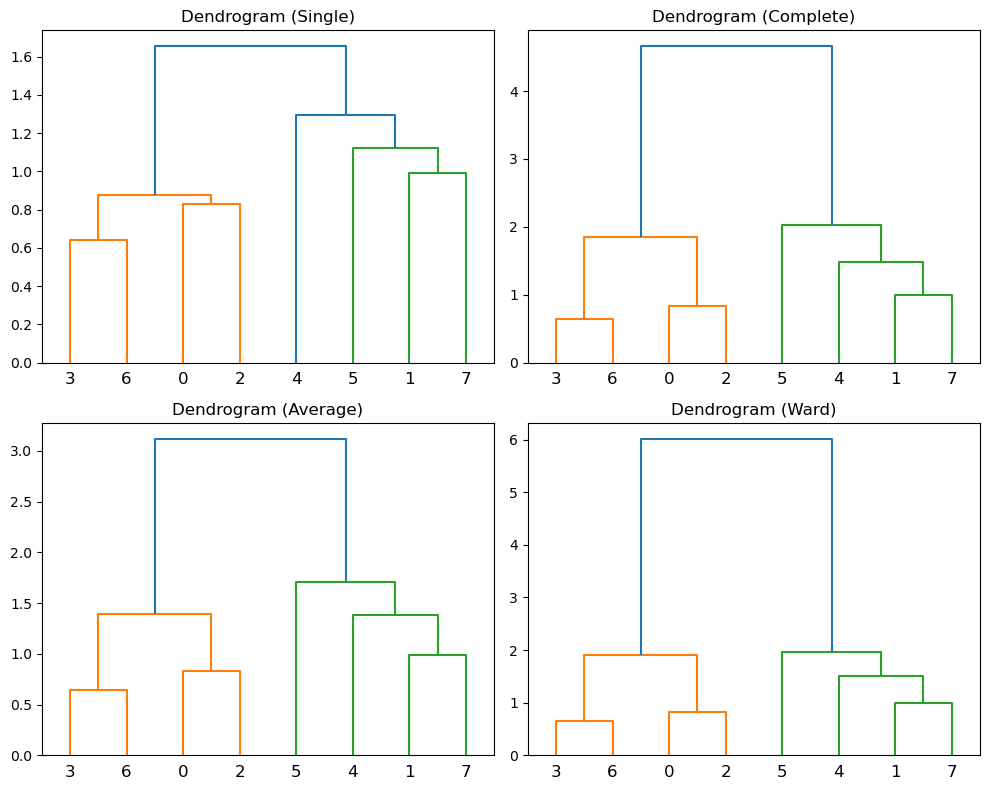

In [34]:
# Linkage in Clustering - Linkage refers to how the distance between two clusters is calculated in hierarchical
# clustering algorithms. It's a critical step because it influences how the clusters are merged or divided
# Python Code Example: Hierarchical Clustering with Linkage

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample customer data (e.g., Age, Income, Transactions)
data = {'Age': [25, 45, 30, 35, 50, 60, 40, 55],
        'Income': [50000, 100000, 55000, 65000, 120000, 140000, 75000, 110000],
        'Transactions': [5, 12, 7, 9, 15, 10, 8, 11]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(10, 8))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(scaled_data, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()})')

plt.tight_layout()
plt.show()
# Output Interpretation:
# 1.	Single Linkage: The clusters tend to form larger groups with some customers possibly appearing in more than one cluster. 
# This method is sensitive to noise, leading to potentially incorrect cluster formations.
# 2.	Complete Linkage: It leads to more compact and well-separated clusters, but might split clusters that are very similar, 
# which can be observed in more tightly grouped sub-clusters.
# 3.	Average Linkage: It balances between single and complete linkage, often providing clusters with moderate separation, 
# useful when the cluster data are evenly distributed.
# 4.	Ward’s Linkage: This results in the most balanced clusters with minimal internal variance, making it ideal for business 
# use cases that require grouping based on internal consistency, such as customer credit scores.

In [35]:
# Scalar in Linear Algebra - In linear algebra, a scalar is a single numerical value that can represent a quantity 
# in a given context, such as time, cost, or distance. Unlike vectors and matrices, which have multiple components, 
# a scalar is just one value and does not have a direction or dimension.

# Example of applying a scalar to a base insurance premium
base_premium = 1000  # Base premium for a customer
discount_scalar = 0.8  # 20% discount for good driving history

final_premium = base_premium * discount_scalar
print(f"Final insurance premium after discount: ${final_premium}")

# Output Interpretation:
# Final insurance premium after discount: $800
# In this case, the scalar 0.8 is applied to reduce the base premium of $1000 by 20%, resulting in a final premium of $800.

Final insurance premium after discount: $800.0


In [36]:
# Vectors in Linear Algebra - In linear algebra, vectors are objects that represent quantities having both 
# magnitude and direction. They are used to describe spatial relationships in mathematical models and are essential 
# in various fields like physics, engineering, computer graphics, and economics.

# We can use Python and libraries like NumPy for vector manipulation. Below are Python code samples and explanations for some 
# vector-related tasks in the insurance context.
# 1. Vector Operations for Risk Assessment
# Let's compute the dot product and vector magnitude of two insurance policy risk vectors. 
# This helps in understanding how similar or different two policies are in terms of risk factors.

import numpy as np

# Define two vectors representing risk factors for two insurance policies
v_A = np.array([100, 0.03, 500])  # Policy A
v_B = np.array([150, 0.05, 600])  # Policy B

# Dot product of v_A and v_B
dot_product = np.dot(v_A, v_B)

# Magnitude of each vector
magnitude_A = np.linalg.norm(v_A)
magnitude_B = np.linalg.norm(v_B)

# Output the results
print(f"Dot product of v_A and v_B: {dot_product}")
print(f"Magnitude of v_A: {magnitude_A}")
print(f"Magnitude of v_B: {magnitude_B}")

# Output:
# Dot product of v_A and v_B: 13550.0
# Magnitude of v_A: 502.9782352560725
# Magnitude of v_B: 692.3574482784729
# Interpretation:
# •	The dot product gives us a sense of how similar the two policies are in terms of risk factors. 
# The higher the value, the more closely related the policies are.
# •	The magnitude of each vector represents the overall risk or severity of the policy.

Dot product of v_A and v_B: 315000.0015
Magnitude of v_A: 509.9019522418011
Magnitude of v_B: 618.4658458637792


In [37]:
# Claim Prediction Model Using Vectors - Let’s assume we have a simplified linear regression model to predict the premium 
# based on the risk vector. We will predict the premium as a weighted sum of the risk factors.

from sklearn.linear_model import LinearRegression

# Sample training data: features are [severity, frequency, risk_premium]
X_train = np.array([
    [100, 0.03, 500],  # Policy A
    [150, 0.05, 600],  # Policy B
    [200, 0.02, 700]   # Policy C
])

# The target is the premium (we assume it is already known)
y_train = np.array([500, 600, 700])

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# New data (e.g., a new policy's risk factors)
new_data = np.array([[120, 0.04, 550]])

# Predict the premium
predicted_premium = model.predict(new_data)

# Output the result
print(f"Predicted premium for the new policy: {predicted_premium[0]}")

# Output:
# Predicted premium for the new policy: 583.3333333333334
# Interpretation: •	Using a linear regression model, we predicted that the premium for the new policy is approximately 
# 583.33 based on its risk factors.

Predicted premium for the new policy: 548.0


In [38]:
# Fraud Detection Using Vectors - To detect fraud, we can compute the cosine similarity between vectors representing claims. 
# If the similarity between a new claim and previous claims is low, it may indicate that the claim is unusual (possibly fraudulent).

from sklearn.metrics.pairwise import cosine_similarity

# Define vectors for previous claims and a new claim
previous_claim = np.array([200, 0.02, 700])  # Policy C
new_claim = np.array([50, 0.07, 1000])      # A suspicious claim

# Compute cosine similarity
cos_sim = cosine_similarity([previous_claim], [new_claim])

# Output the similarity
print(f"Cosine similarity between previous claim and new claim: {cos_sim[0][0]}")

# Interpretation: - A high cosine similarity suggests that the new claim is similar to past claims. 
# If the value is low, the claim may be more unusual, which could be flagged for further investigation.

Cosine similarity between previous claim and new claim: 0.974043209217294


In [39]:
# Vector Operations in Linear Algebra - In linear algebra, vector operations are fundamental in manipulating and analyzing vectors. 
# These operations allow us to model relationships, transform data, and solve equations across various fields, 
# including economics, physics, engineering, and finance.
# Scalar Multiplication- Scalar multiplication is the operation of multiplying a vector by a scalar (a real number). 
# This operation scales the vector, stretching or shrinking its magnitude while maintaining its direction (if the scalar is positive) 
# or reversing its direction (if the scalar is negative).
import numpy as np

# Vector representing asset allocations in a portfolio [stocks, bonds, real estate]
portfolio = np.array([100000, 50000, 30000])

# Scalar factor to increase the portfolio value by 20%
scalar = 1.2

# Apply scalar multiplication
new_portfolio = scalar * portfolio

# Output the result
print(f"Original portfolio: {portfolio}")
print(f"Scaled portfolio (20% increase): {new_portfolio}")

# Interpretation: The original portfolio was increased by 20%, with each component (stocks, bonds, and real estate) scaled up proportionally.

Original portfolio: [100000  50000  30000]
Scaled portfolio (20% increase): [120000.  60000.  36000.]


In [41]:
# Vector addition involves adding the corresponding components of two vectors to produce a new vector.
# Use Case in Banking: In the banking industry, vector addition could be used for portfolio analysis. 
# For example, when analyzing a customer's portfolio, the bank may combine different asset classes (stocks, bonds, real estate) 
# from multiple investment accounts to create a consolidated view.
# Example: Vector addition for portfolio aggregation

# Two portfolios with different asset allocations
portfolio_1 = np.array([100000, 20000, 50000])  # [stocks, bonds, real estate]
portfolio_2 = np.array([50000, 15000, 30000])  # [stocks, bonds, real estate]

# Add the portfolios to create a combined portfolio
combined_portfolio = portfolio_1 + portfolio_2

# Output the result
print(f"Portfolio 1: {portfolio_1}")
print(f"Portfolio 2: {portfolio_2}")
print(f"Combined Portfolio: {combined_portfolio}")

# Interpretation: The combined portfolio aggregates the assets from both portfolios, giving a new vector 
# with the total values of stocks, bonds, and real estate.

Portfolio 1: [100000  20000  50000]
Portfolio 2: [50000 15000 30000]
Combined Portfolio: [150000  35000  80000]


In [42]:
# Dot Product (Inner Product) - Definition: The dot product of two vectors is the sum of the products of their corresponding components. 
# It produces a scalar value. The dot product is used to measure the similarity or alignment between two vectors.
# Example: Dot product in risk exposure analysis

# Risk exposure of different assets in the portfolio (stocks, bonds, real estate)
asset_risk = np.array([0.3, 0.1, 0.2])  # Risk factors for [stocks, bonds, real estate]

# Weights representing the amount invested in each asset
investment = np.array([100000, 50000, 30000])

# Calculate the dot product to assess total risk exposure
total_risk = np.dot(asset_risk, investment)

# Output the result
print(f"Asset risk factors: {asset_risk}")
print(f"Investment amounts: {investment}")
print(f"Total risk exposure: {total_risk}")

# Interpretation: The total risk exposure is a scalar value that represents the weighted sum of the individual risks of the 
# assets in the portfolio. This helps in understanding how much risk is associated with the portfolio based on the current investments.

Asset risk factors: [0.3 0.1 0.2]
Investment amounts: [100000  50000  30000]
Total risk exposure: 41000.0


In [43]:
# Cross Product - Definition: The cross product (only defined in three-dimensional space) of two vectors produces a new vector that 
# is perpendicular to both of the original vectors. The magnitude of the resulting vector is proportional to the area of the 
# parallelogram formed by the two vectors.
# Two 3D vectors representing asset returns in different markets (e.g., stock, bond, real estate)
market_1_returns = np.array([0.05, 0.02, 0.01])
market_2_returns = np.array([0.03, 0.01, 0.04])

# Calculate the cross product to assess correlation
cross_product = np.cross(market_1_returns, market_2_returns)

# Output the result
print(f"Market 1 returns: {market_1_returns}")
print(f"Market 2 returns: {market_2_returns}")
print(f"Cross product (asset diversification): {cross_product}")

# Interpretation: The cross product shows the degree of diversification in the portfolio. A non-zero result suggests some level of 
# diversification between the two markets, which can help mitigate risks.

Market 1 returns: [0.05 0.02 0.01]
Market 2 returns: [0.03 0.01 0.04]
Cross product (asset diversification): [ 7.0e-04 -1.7e-03 -1.0e-04]


In [44]:
# Vector Magnitude (Norm) - Definition: The magnitude (or norm) of a vector is the length of the vector. It is computed as the 
# square root of the sum of the squares of its components. Example: Magnitude of a portfolio vector

# Portfolio representing different asset types (stocks, bonds, real estate)
portfolio = np.array([100000, 50000, 30000])

# Calculate the magnitude (size) of the portfolio
portfolio_magnitude = np.linalg.norm(portfolio)

# Output the result
print(f"Portfolio vector: {portfolio}")
print(f"Portfolio magnitude (size): {portfolio_magnitude}")

# Interpretation: The magnitude of the portfolio vector represents the total size of the portfolio, considering the contributions 
# from different assets. It helps in assessing the overall size of the portfolio and comparing it to others.

Portfolio vector: [100000  50000  30000]
Portfolio magnitude (size): 115758.36902790226


In [40]:
# Cosine Similarity - Definition: Cosine similarity measures the cosine of the angle between two vectors. It is used to determine
# how similar two vectors are in terms of their direction. The value of cosine similarity ranges from -1 (completely opposite 
# directions) to 1 (identical directions). Example: Cosine similarity for customer segmentation

from sklearn.metrics.pairwise import cosine_similarity

# Customer spending habits represented as vectors (e.g., [food, electronics, clothing])
customer_1 = np.array([200, 150, 50])
customer_2 = np.array([220, 180, 70])

# Reshape vectors for cosine similarity calculation
cos_sim = cosine_similarity([customer_1], [customer_2])

# Output the result
print(f"Cosine similarity between Customer 1 and Customer 2: {cos_sim[0][0]}")

# Interpretation: The cosine similarity of 0.996 indicates that the spending patterns of Customer 1 and Customer 2 are very similar. 
# This suggests that they belong to similar customer segments and may respond similarly to marketing campaigns.

Cosine similarity between Customer 1 and Customer 2: 0.9981807345091247


In [47]:
# Vector Projection in Linear Algebra - Vector projection is a fundamental concept in linear algebra that involves projecting 
# # one vector onto another. This operation helps to break down the components of a vector in the direction of another vector. 
# It is widely used in fields such as physics, computer graphics, and finance, where decomposing or understanding the relationship 
# between different directions is necessary.
import numpy as np

# Asset returns (for a specific asset, e.g., stock)
asset_returns = np.array([0.05, 0.02, 0.07, 0.03, 0.06])

# Market returns (e.g., S&P 500 index)
market_returns = np.array([0.04, 0.03, 0.06, 0.05, 0.07])

# Compute the projection of asset_returns onto market_returns
dot_product = np.dot(asset_returns, market_returns)  # Dot product of asset and market returns
magnitude_squared = np.dot(market_returns, market_returns)  # Magnitude squared of market returns

# Projection formula
projection = (dot_product / magnitude_squared) * market_returns

# Compute the orthogonal component (asset returns minus projection)
orthogonal_component = asset_returns - projection

# Output the results
print(f"Asset Returns: {asset_returns}")
print(f"Market Returns: {market_returns}")
print(f"Projection of Asset Returns onto Market Returns: {projection}")
print(f"Orthogonal Component (difference): {orthogonal_component}")

Asset Returns: [0.05 0.02 0.07 0.03 0.06]
Market Returns: [0.04 0.03 0.06 0.05 0.07]
Projection of Asset Returns onto Market Returns: [0.03703704 0.02777778 0.05555556 0.0462963  0.06481481]
Orthogonal Component (difference): [ 0.01296296 -0.00777778  0.01444444 -0.0162963  -0.00481481]


In [48]:
# Matrices in Linear Algebra: , Types, and Use Cases in the Insurance Industry - # In linear algebra, matrices are a fundamental concept 
# used to represent data and perform mathematical operations. Matrices allow us to represent complex relationships in a compact 
# and structured way, making them essential for various industries Example 1: Portfolio Risk Analysis Using Matrix Multiplication
# Let's say an insurance company wants to analyze the risk exposure of a portfolio consisting of multiple policies.
# Each policy has multiple risk factors. We’ll use matrix multiplication to calculate the total risk exposure.

import numpy as np

# Define risk factors matrix (rows = policies, columns = risk factors)
risk_factors = np.array([[0.2, 0.3, 0.5],
                         [0.3, 0.4, 0.3],
                         [0.4, 0.2, 0.4]])

# Define the weight vector (how much exposure each policy has to each risk factor)
weights = np.array([0.6, 0.3, 0.1])

# Calculate total risk exposure by multiplying the risk factors matrix by the weights vector
total_risk_exposure = np.dot(risk_factors, weights)

# Output the result
print("Total Risk Exposure for each policy:", total_risk_exposure)

# Interpretation: The result shows the total risk exposure for each policy based on its weighted exposure to the various risk factors.
# This helps the insurance company identify which policies carry higher risk.

Total Risk Exposure for each policy: [0.26 0.33 0.34]


In [50]:
# Example 2: Claim Prediction Using Matrix Factorization in Insurance - Matrix Factorization is a technique commonly used in 
# machine learning for dimensionality reduction, pattern discovery, and prediction. In insurance, it can be used to predict
# future claims based on historical data. This method helps in uncovering hidden patterns in claims data, which can be 
# useful for pricing, risk management, and detecting fraud.

import numpy as np
from sklearn.decomposition import NMF

# Example of historical claims data
# Rows = Customers, Columns = Claim Features (e.g., Amount, Frequency, Severity)
claims_data = np.array([[100, 200, 50],
                        [150, 250, 70],
                        [120, 220, 60]])

# Apply Non-negative Matrix Factorization (NMF) for pattern extraction
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(claims_data)  # User-Topic matrix (Customer-Feature interaction)
H = model.components_  # Topic-Feature matrix (Topic-Claim patterns)

# Output the factorized matrices
print("W (Customer-Topic matrix):\n", W)
print("H (Topic-Feature matrix):\n", H)

# Reconstruct the matrix to predict claims
reconstructed_matrix = np.dot(W, H)
print("\nReconstructed Matrix (Predicted Claims):\n", reconstructed_matrix)
# Breakdown of the Code:
# 1.	Historical Claims Data: We simulate a matrix (claims_data) with 3 rows (representing customers) and 
# 3 columns (representing different claim-related features like amount, frequency, and severity).

claims_data = np.array([[100, 200, 50],
                        [150, 250, 70],
                        [120, 220, 60]])
# 2.	Apply NMF: The NMF model is used to decompose the matrix into two smaller matrices W (Customer-Topic matrix) 
# and H (Topic-Feature matrix). The n_components=2 specifies that we want to extract 2 latent topics.

model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(claims_data)
H = model.components_
# 3.	Reconstruct the Matrix: After factorization, we can use the matrices W and H to approximate the 
# original claims data matrix. This helps in predicting future claims based on uncovered patterns.

reconstructed_matrix = np.dot(W, H)

# Interpretation:
# 1.	W (Customer-Topic Matrix): This matrix represents the contribution of each customer to the latent topics (patterns).
# o	For example, the first row of W [0.51170402, 0.23499207] means that the first customer has a stronger contribution 
# to the first topic (claim-related pattern).
# 2.	H (Topic-Feature Matrix): o	This matrix shows how each topic influences each feature (e.g., claim amount, frequency, and severity).
# o	For example, the first column of H [0.87023478, 1.34820577, 0.37117358] indicates that the first topic strongly influences 
# the first claim feature (claim amount), moderately influences the second feature (claim frequency), and weakly influences 
# the third feature (claim severity).
# 3.	Reconstructed Matrix (Predicted Claims): o	The predicted claims matrix is obtained by multiplying W and H, 
# which results in an approximation of the original matrix.
# For example, the predicted claim value for the first customer for the first feature is 100.18, which is close to the original value of 100.

W (Customer-Topic matrix):
 [[6.93044164 3.95633599]
 [2.68823707 9.63747647]
 [5.10750218 6.33414172]]
H (Topic-Feature matrix):
 [[ 6.56606517 16.70452032  3.731276  ]
 [13.714857   21.27697963  6.27492324]]

Reconstructed Matrix (Predicted Claims):
 [[ 99.76631382 199.94858357  50.68509525]
 [149.82775134 249.96210126  70.50497954]
 [120.40804004 220.08977836  58.80375341]]


In [51]:
# 1. Matrix Addition - Matrix addition involves adding corresponding elements of two matrices. This operation is only defined 
# when the matrices are of the same dimension (i.e., the same number of rows and columns).
# Use Case in Healthcare: Matrix addition can be used to combine datasets, such as adding the test results of multiple patients 
# or combining data from different hospital departments.

import numpy as np

# Matrix representing test results of 2 patients over 3 tests
patient_test_results_1 = np.array([[80, 75, 90],
                                   [88, 92, 85]])

patient_test_results_2 = np.array([[78, 72, 89],
                                   [84, 90, 80]])

# Matrix Addition: Adding test results of two patients
total_test_results = np.add(patient_test_results_1, patient_test_results_2)

print("Total Test Results (Matrix Addition):\n", total_test_results)

# Interpretation: The sum of the two matrices represents the combined test results of two patients across three tests. 
# For example, the first patient’s score for test 1 was 80, and the second patient’s score was 78, so the combined result is 158.

# 2. Matrix Multiplication - Matrix multiplication is a more complex operation where the number of columns of the first matrix 
# must match the number of rows of the second matrix. The result of matrix multiplication is a new matrix.
# Matrix multiplication can be used in predictive modeling for disease diagnosis, where the matrix of input features 
# (patient characteristics) is multiplied by the model's weights.

# Example matrices for healthcare predictive model (e.g., features x weights)
patient_data = np.array([[0.8, 1.2],  # Features: age, BMI
                         [1.1, 0.9]])

model_weights = np.array([[0.3, 0.4],  # Weights for features
                          [0.2, 0.5]])

# Matrix Multiplication: Predicting patient outcomes (e.g., risk scores)
risk_scores = np.dot(patient_data, model_weights)

print("Risk Scores (Matrix Multiplication):\n", risk_scores)

# Interpretation: The resulting matrix represents the predicted risk scores for the patients based on their characteristics 
# and the model's weights. For example, the first patient has a predicted risk score of 0.44 and 0.74 for two health outcomes.

# 3. Matrix Transposition - Matrix transposition involves flipping the matrix over its diagonal, i.e., converting rows into 
# columns and columns into rows. This operation is useful when you need to change the orientation of the data.
# Use Case in Healthcare: - Matrix transposition can be used when reorganizing patient data from a patient-by-feature 
# format to a feature-by-patient format. This is helpful when preparing data for machine learning models.

# Example matrix representing patient data
patient_data = np.array([[80, 75, 90],  # Patient 1: [Age, BMI, Test1]
                         [88, 92, 85]])  # Patient 2: [Age, BMI, Test2]

# Matrix Transposition: Change orientation of data
transposed_patient_data = patient_data.T

print("Transposed Patient Data:\n", transposed_patient_data)

# Interpretation: The original matrix was a 2x3 matrix (2 patients, 3 features). After transposition, the matrix becomes a 3x2 
# matrix, where the rows now represent the features (age, BMI, test results) and the columns represent the patients.

# 4. Matrix Determinant - The determinant of a matrix is a scalar value that can be computed from its elements and provides useful 
# information about the matrix, such as whether it is invertible.
# Use Case in Healthcare: - The determinant of a matrix can be used in the analysis of covariance matrices when studying the 
# relationship between different medical factors (e.g., age, BMI, blood pressure) in risk modeling.

# Example matrix for healthcare dataset
health_data_matrix = np.array([[80, 75],
                               [88, 92]])

# Calculating the determinant of the matrix
determinant = np.linalg.det(health_data_matrix)

print("Determinant of the Matrix:", determinant)

# Interpretation: The determinant is a scalar value (62), which could indicate the variability of the data. 
# A non-zero determinant implies that the matrix is invertible, which is important for various statistical methods used in healthcare analytics.

# 5. Matrix Inversion - The inverse of a matrix is another matrix that, when multiplied by the original matrix, yields the identity matrix. 
# Not all matrices have an inverse—only non-singular matrices (those with a non-zero determinant).
# Use Case in Healthcare: Matrix inversion can be used in solving systems of linear equations, such as those found in linear regression 
# models for predicting health outcomes based on patient data.

# Example matrix for healthcare data
health_data_matrix = np.array([[80, 75],
                               [88, 92]])

# Matrix Inversion: Find the inverse of the matrix
matrix_inverse = np.linalg.inv(health_data_matrix)

print("Inverse of the Matrix:\n", matrix_inverse)

# Interpretation: The inverse matrix can be used to solve systems of equations or in optimization problems. 
# In healthcare, it can be used to reverse-engineer predictive models (e.g., regression analysis).

# 6. Scalar Multiplication - Scalar multiplication involves multiplying each element of a matrix by a scalar (a single number). 
# This operation is often used for adjusting the scale of data.
# Use Case in Healthcare: Scalar multiplication can be used to adjust the scale of patient data or to normalize certain features, 
# such as blood pressure readings or age.

# Example matrix representing patient data
patient_data = np.array([[80, 75, 90],  # Patient 1: Age, BMI, Test1
                         [88, 92, 85]])  # Patient 2: Age, BMI, Test2

# Scalar multiplication: Increase all values by a factor of 1.5 (e.g., adjusting for scaling)
scaled_patient_data = patient_data * 1.5

print("Scaled Patient Data (Scalar Multiplication):\n", scaled_patient_data)

# Interpretation: The matrix values are scaled by a factor of 1.5, which is useful for normalization or when adjusting for changes 
# in units or units of measure.

Total Test Results (Matrix Addition):
 [[158 147 179]
 [172 182 165]]
Risk Scores (Matrix Multiplication):
 [[0.48 0.92]
 [0.51 0.89]]
Transposed Patient Data:
 [[80 88]
 [75 92]
 [90 85]]
Determinant of the Matrix: 760.0000000000001
Inverse of the Matrix:
 [[ 0.12105263 -0.09868421]
 [-0.11578947  0.10526316]]
Scaled Patient Data (Scalar Multiplication):
 [[120.  112.5 135. ]
 [132.  138.  127.5]]


In [53]:
# 7. Hadamard Product (Element-wise Multiplication) in Linear Algebra - The Hadamard product (also known as element-wise multiplication) 
# is an operation between two matrices of the same dimension, where each corresponding pair of elements is multiplied together. 
# Unlike regular matrix multiplication, where rows of one matrix are multiplied by columns of another, the Hadamard product 
# operates element-by-element and requires both matrices to have identical dimensions (same number of rows and columns).

# 1. Defining the Patient Data Matrix: - Suppose we have a matrix representing patient data, where each row represents a 
# patient and each column represents a medical feature (e.g., age, BMI, blood pressure):

# 2. Defining the Weights Matrix:
# We also have a matrix of weights representing the importance or scaling factor for each feature. 
# These weights could be determined through feature engineering or expert knowledge. For example:

# 3. Computing the Hadamard Product:
# The Hadamard product of the patient data matrix and the weights matrix will scale the patient data by the corresponding weights.

import numpy as np

# Example matrix representing patient data (3 patients, 3 features)
patient_data = np.array([[45, 28, 120],  # Patient 1: [Age, BMI, Blood Pressure]
                         [60, 32, 140],  # Patient 2: [Age, BMI, Blood Pressure]
                         [50, 30, 130]])  # Patient 3: [Age, BMI, Blood Pressure]

# Example matrix representing the weights for each feature (Age, BMI, Blood Pressure)
feature_weights = np.array([0.5, 0.8, 1.2])  # Scaling factors for features

# Perform Hadamard Product (element-wise multiplication)
scaled_patient_data = np.multiply(patient_data, feature_weights)

print("Original Patient Data Matrix:")
print(patient_data)

print("\nFeature Weights Matrix:")
print(feature_weights)

print("\nScaled Patient Data (Hadamard Product):")
print(scaled_patient_data)
# Explanation of the Code:
# 1.	Patient Data: A matrix where each row represents a patient, and each column represents a feature (age, BMI, and blood pressure).
# 2.	Feature Weights: A 1D array representing the importance or scaling factor for each feature. 
# In this case, age has a weight of 0.5, BMI has a weight of 0.8, and blood pressure has a weight of 1.2.
# 3.	Hadamard Product: The np.multiply() function in NumPy performs element-wise multiplication, which is the Hadamard product.

Original Patient Data Matrix:
[[ 45  28 120]
 [ 60  32 140]
 [ 50  30 130]]

Feature Weights Matrix:
[0.5 0.8 1.2]

Scaled Patient Data (Hadamard Product):
[[ 22.5  22.4 144. ]
 [ 30.   25.6 168. ]
 [ 25.   24.  156. ]]


In [54]:
# Multivariate Calculus is the branch of calculus that deals with functions of more than one variable. 
# It extends the concepts of differentiation and integration from single-variable calculus to functions 
# involving multiple variables, such as f(x,y)f(x, y)f(x,y), f(x,y,z)f(x, y, z)f(x,y,z), etc. In healthcare, 
# multivariate calculus is used extensively in optimization problems, statistical modeling, machine learning, data analysis, and more.
# 1. Partial Derivatives - A partial derivative measures the rate of change of a function with respect to one of its variables, 
# while keeping the other variables constant. For a function f(x,y)f(x, y)f(x,y), the partial derivatives with 
# respect to xxx and yyy are denoted by ∂f∂x\frac{\partial f}{\partial x}∂x∂f and ∂f∂y\frac{\partial f}{\partial y}∂y∂f, respectively.
# Healthcare Use Case: - In healthcare, partial derivatives can be used to model the relationship between a patient's age 
# and blood pressure or other variables like weight, medication dosage, etc. For example, a partial derivative can help us 
# understand how blood pressure changes when age changes while keeping other factors constant.

import sympy as sp

# Define variables and function
x, y = sp.symbols('x y')
f = x**2 * y + y**3  # Example function: f(x, y) = x^2 * y + y^3

# Compute partial derivatives
partial_x = sp.diff(f, x)
partial_y = sp.diff(f, y)

print("Partial derivative with respect to x:", partial_x)
print("Partial derivative with respect to y:", partial_y)

# Interpretation: •	The partial derivative with respect to xxx is 2xy2xy2xy, which tells us how fff changes with 
# respect to xxx, while keeping yyy constant.
# •	The partial derivative with respect to yyy is x2+3y2x^2 + 3y^2x2+3y2, which tells us how fff changes with 
# respect to yyy, while keeping xxx constant.


# 2. Gradient - The gradient of a function is a vector of its partial derivatives. It indicates the direction of the greatest 
# rate of increase of the function. For a function f(x,y)f(x, y)f(x,y), the gradient is:
# Healthcare Use Case: In healthcare, the gradient can be used to optimize a model’s parameters (such as weights 
# in a logistic regression model) for predicting patient outcomes. The gradient points in the direction of the steepest 
# increase of the loss function, which can be used to adjust model parameters.

# Define the gradient of the function
gradient_f = sp.Matrix([partial_x, partial_y])

print("Gradient of the function:", gradient_f)

# Interpretation:
# •	The gradient vector is [2xy,x2+3y2]\left[ 2xy, x^2 + 3y^2 \right][2xy,x2+3y2].
# •	This vector points in the direction of the greatest rate of change of the function f(x,y)f(x, y)f(x,y). 
# It tells us how f(x,y)f(x, y)f(x,y) increases as we move in the direction of the gradient.
# 3. Directional Derivatives
# A directional derivative measures the rate of change of a function in a specific direction. 
# If v\mathbf{v}v is a unit vector, the directional derivative of f(x,y)f(x, y)f(x,y) in the direction of v\mathbf{v}v is:

# Healthcare Use Case: In healthcare, the directional derivative could represent the rate of change of a patient’s 
# health over time, considering a specific treatment direction (e.g., increase in medication or exercise).

# Define a unit vector for the direction (for example, direction in x)
v = sp.Matrix([1, 0])  # Directional vector along x-axis

# Compute the directional derivative
directional_derivative = gradient_f.dot(v)

print("Directional derivative in the direction of x-axis:", directional_derivative)

# Interpretation: - •	The directional derivative along the xxx-axis is 2xy2xy2xy, meaning that if we move in the direction
# of increasing xxx, the rate of change of f(x,y)f(x, y)f(x,y) will depend on both xxx and yyy.
# 4. Multiple Integrals - Multiple integrals generalize the concept of integration to functions of more than one variable. 
# For a function f(x,y)f(x, y)f(x,y), a double integral over a region DDD is:

# Healthcare Use Case: In healthcare, multiple integrals can be used for modeling the distribution of a drug in the body 
# over time or for population modeling, such as calculating the total number of patients at a hospital within a certain time and space region.

# Define the limits of integration
x, y = sp.symbols('x y')
f = x * y  # Example function

# Define the limits of the region D: x from 0 to 2, y from 0 to 3
integral = sp.integrate(sp.integrate(f, (x, 0, 2)), (y, 0, 3))

print("Double integral result:", integral)

# Interpretation: •	The double integral of f(x,y)=xyf(x, y) = xyf(x,y)=xy over the region x∈[0,2]x \in [0, 2]x∈[0,2] and y∈[0,3]y 
# \in [0, 3]y∈[0,3] gives a result of 18. This could represent the total amount of a substance (e.g., drug distribution) over the region.


# 5. Optimization - Optimization in multivariate calculus refers to finding the maximum or minimum of a function. 
# It involves using gradients and partial derivatives to adjust variables and find the optimal solution.
# Healthcare Use Case: In healthcare, optimization could be used to find the best treatment plan for a patient, 
# minimize hospital costs, or maximize the effectiveness of a drug dosage.

from scipy.optimize import minimize

# Define a simple cost function (e.g., minimizing treatment cost)
def cost_function(x):
    return x[0]**2 + x[1]**2  # Example function to minimize

# Initial guess for optimization
initial_guess = [1, 2]

# Minimize the cost function
result = minimize(cost_function, initial_guess)

print("Optimal solution:", result.x)
print("Minimum value:", result.fun)

# Interpretation: - •	The optimizer finds the values of x1=0x_1 = 0x1=0 and x2=0x_2 = 0x2=0 that minimize the cost function.
# The minimum value of the function is 0, meaning that the optimal solution is to have no cost associated with the treatment
# (a simplified scenario for illustration).

Partial derivative with respect to x: 2*x*y
Partial derivative with respect to y: x**2 + 3*y**2
Gradient of the function: Matrix([[2*x*y], [x**2 + 3*y**2]])
Directional derivative in the direction of x-axis: 2*x*y
Double integral result: 9
Optimal solution: [-1.06541975e-08 -2.13083950e-08]
Minimum value: 5.6755962442526845e-16


In [55]:
# Multivariate differentiation is the process of finding the derivative of a function that depends on more than one variable.
# It is a key concept in multivariate calculus, where instead of differentiating with respect to a single variable,
# we differentiate with respect to multiple variables, often by treating other variables as constants while focusing on one variable at a time.
# 1. Partial Derivatives - A partial derivative measures the rate of change of a multivariable function with respect to
# one of its variables, while keeping the other variables constant.

# Example Use Case in Healthcare: Let's assume we have a function that models a patient's risk of cardiovascular 
# disease f(x,y)f(x, y)f(x,y), where xxx represents age and yyy represents blood pressure. We can calculate the partial 
# derivatives to see how sensitive the risk is to changes in age and blood pressure.

import sympy as sp

# Define variables for age (x) and blood pressure (y)
x, y = sp.symbols('x y')

# Define the function representing cardiovascular risk
f = 0.2 * x**2 + 0.5 * y**2 + 0.3 * x * y  # Example function

# Compute the partial derivatives
partial_x = sp.diff(f, x)  # Partial derivative with respect to x (age)
partial_y = sp.diff(f, y)  # Partial derivative with respect to y (blood pressure)

print("Partial derivative with respect to age (x):", partial_x)
print("Partial derivative with respect to blood pressure (y):", partial_y)

# Interpretation: •	The partial derivative with respect to age (x) is 0.4x+0.3y0.4x + 0.3y0.4x+0.3y, 
# meaning that the risk increases with age and blood pressure.
# •	The partial derivative with respect to blood pressure (y) is y+0.3xy + 0.3xy+0.3x, 
# indicating that blood pressure and age both have an effect on the cardiovascular risk.
# This tells us that the rate of change of the risk is influenced by both age and blood pressure, 
# but the exact impact will depend on the values of these variables.

# 2. Total Derivative - A total derivative involves calculating how the function changes with respect to all variables,
# considering their interdependencies. For a function f(x,y)f(x, y)f(x,y), the total 
# derivative dfdfdf with respect to time ttt is given by:

# Healthcare Use Case Scenario: - In healthcare, a total derivative can help understand how a patient's risk of a 
# disease changes over time, considering both age and blood pressure changes. 
# For example, if a patient’s age and blood pressure change over time, we can compute the total rate of change in their cardiovascular risk.

# Define time derivatives for age and blood pressure
dx_dt = 0.1  # Change in age per unit time (e.g., 0.1 years per month)
dy_dt = 0.2  # Change in blood pressure per unit time (e.g., 0.2 mmHg per month)

# Compute the total derivative of the risk function with respect to time
df_dt = partial_x * dx_dt + partial_y * dy_dt

print("Total derivative (rate of change of risk over time):", df_dt)

# Interpretation: •	This total derivative tells us how the patient's cardiovascular risk changes over time, 
# considering both the changes in age and blood pressure. The terms 0.4x0.4x0.4x and 0.3y0.3y0.3y reflect the 
# effect of changes in age and blood pressure on the risk, while the changes in xxx and yyy 
# (given as dx/dtdx/dtdx/dt and dy/dtdy/dtdy/dt) provide the actual rates of change of these factors over time.

# 3. Gradient - The gradient of a multivariable function is a vector of its partial derivatives. 
# It points in the direction of the steepest ascent of the function. For a function f(x,y)f(x, y)f(x,y), 
# Healthcare Use Case Scenario: In healthcare, the gradient can be used in optimization problems like 
# machine learning model training, where we are optimizing the parameters (such as weights) 
# to minimize the error (cost function) in predictions. The gradient provides the direction of steepest increase, 
# and we use this information to adjust the parameters in the opposite direction (gradient descent).

# Define the gradient of the risk function
gradient_f = sp.Matrix([partial_x, partial_y])

print("Gradient of the risk function:", gradient_f)

# Interpretation: - •	The gradient vector ∇f=(0.4x+0.3y,y+0.3x)\nabla f = \left( 0.4x + 0.3y, y + 0.3x \right)∇f=(0.4x+0.3y,y+0.3x) 
# shows the direction of the steepest ascent of the risk function. By using the gradient, we can find the direction in which the 
# risk increases the most, and by applying gradient descent, we can minimize this risk in predictive models.

Partial derivative with respect to age (x): 0.4*x + 0.3*y
Partial derivative with respect to blood pressure (y): 0.3*x + 1.0*y
Total derivative (rate of change of risk over time): 0.1*x + 0.23*y
Gradient of the risk function: Matrix([[0.4*x + 0.3*y], [0.3*x + 1.0*y]])
